In [8]:
import pandas as pd
from datetime import datetime, timedelta
import warnings
import plotly.plotly as py
from pandas import TimeGrouper
import plotly.graph_objs as go
warnings.filterwarnings("ignore")
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
history_weather = pd.read_csv("/home/jovyan/data/weather_extract.csv", index_col="date")
df = history_weather[['minimum_temperature','maximum_temperature','station_id']]
df['date'] = pd.to_datetime(df.index)
df.index = df['station_id']
del df['station_id']
df.columns

Index(['minimum_temperature', 'maximum_temperature', 'date'], dtype='object')

In [3]:
pre_col = ['Lat', 'Lon','rainfall_mm','3pm_relative_humidity','3pm_relative_humidity', 'minimum_temperature', 'maximum_temperature', 'condition', 'date']
predicted_weather = pd.read_csv("/home/jovyan/data/prediction_weather.psv", sep='|', header=None, names = pre_col)
predicted_weather.index.name = 'station_id'
df1 = predicted_weather[['minimum_temperature','maximum_temperature', 'date']]
df1.columns


Index(['minimum_temperature', 'maximum_temperature', 'date'], dtype='object')

In [6]:
df_union = pd.concat([df,df1])
df_union_filter = df_union.loc[df_union.index == 3003]
df_union_filter.set_index('date').head()

,minimum_temperature,maximum_temperature
date,,
2017-01-01 00:00:00,28.2,33.0
2017-01-02 00:00:00,28.0,34.1
2017-01-03 00:00:00,29.4,38.6
2017-01-04 00:00:00,29.5,36.5
2017-01-05 00:00:00,24.3,32.7


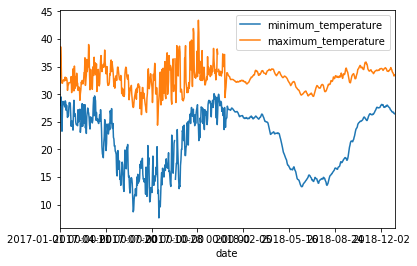

In [9]:
df_union_filter.plot(x='date', y=['minimum_temperature','maximum_temperature'])

            12.6  27.8    0  Unnamed: 4  Unnamed: 5   NW    37  14:42  21.0  \
2017-01-1                                                                     
2017-01-02  15.7  29.9  0.0         NaN         NaN   SE  43.0  16:02  19.6   
2017-01-03  13.1  27.1  0.0         NaN         NaN  ENE  44.0  17:17  19.3   
2017-01-04  11.0  25.1  0.0         NaN         NaN    E  37.0  16:38  17.4   
2017-01-05  11.2  29.9  0.0         NaN         NaN  SSW  54.0  16:57  18.5   
2017-01-06  14.5  30.6  1.4         NaN         NaN  ENE  43.0  17:54  20.3   

              74  ...    CANBERRA AIRPORT  2008  ..  -35.3088  149.2004  GPS  \
2017-01-1         ...                                                          
2017-01-02  73.0  ...    CANBERRA AIRPORT  2008  ..  -35.3088  149.2004  GPS   
2017-01-03  53.0  ...    CANBERRA AIRPORT  2008  ..  -35.3088  149.2004  GPS   
2017-01-04  68.0  ...    CANBERRA AIRPORT  2008  ..  -35.3088  149.2004  GPS   
2017-01-05  68.0  ...    CANBERRA AIRPORT  200

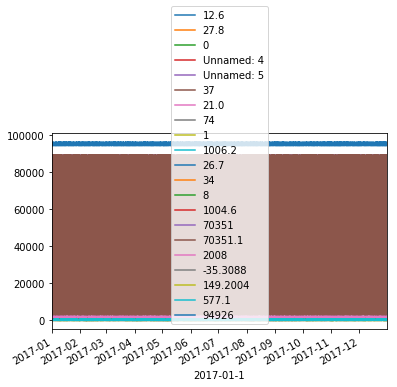

In [10]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m-%d')
 
series = read_csv('/home/jovyan/data/weather_extract.csv', header=1, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()